In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Cloning into 'preprocessing-book'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


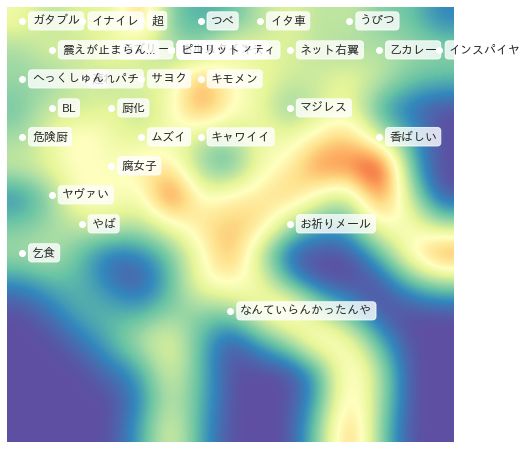

In [4]:
# -*- coding: utf-8 -*-
# matplotlibの日本語化のために必要
!pip install japanize-matplotlib
import pandas as pd
import numpy as np
# SOMのライブラリをインストールしてインポート
!pip install somoclu
from somoclu import Somoclu
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# 日本語化matplotlib
import japanize_matplotlib 
import seaborn as sns
# 日本語フォント設定
sns.set(font='IPAexGothic') 

# 俗語データの読み込み
def load_slangs():
    # githubからダウンロード
    !git clone https://github.com/chiropon/preprocessing-book
    slangs = pd.read_csv('preprocessing-book/jslang.csv')
    features = []
    for c in slangs.columns.values:
        if c != 'word':
            features.append(c)
    X = slangs.loc[:, features].values
    y = slangs['word'].values
    return X, y, features

def main():
    X, y, features = load_slangs()
    sample_index = np.random.choice(
                        X.shape[0], 160, replace=False)
    # SOMを用いて可視化
    # データを間引いて表示（40個）
    sample_X = X[sample_index[:40]]
    sample_y = y[sample_index[:40]]
    # SOMを使って15x15のセル上に配置
    som = Somoclu(n_rows=15, n_columns=15,
                  initialization="pca")
    som.train(data=sample_X, epochs=2000)
    # 可視化した結果をPNG画像で保存
    som.view_umatrix(labels=sample_y, bestmatches=True,
                       filename='som_jslangs.png')

if __name__ == '__main__':
    main()